In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('DATASET-balanced 1.csv')
x = df.drop('LABEL', axis=1)
y = df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [4]:
pred_final = model.predict(x_test)

accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

 Accuracy: 92.19%
 AUC score: 0.922
Precision: 0.926
Recall: 0.923
F1-score: 0.924
MCC: 0.844
Mean Squared Error (MSE) : 0.078
Mean Absolute Error (MAE): 0.078


In [ ]:
# As AdaBoost doesn't directly output probabilities, log loss cannot be calculated for the loss curve.
# Instead, you can plot the classification error against the number of estimators (weak learners).

errors = []
for pred in model.staged_predict(x_test):
    errors.append(1 - accuracy_score(pred, y_test))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('AdaBoost Loss Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Classification Error')
plt.show()

In [ ]:
# As AdaBoost doesn't directly output probabilities, log loss cannot be calculated for the loss graph.
# Instead, you can plot the classification error against the number of estimators (weak learners).

errors = []
for pred in model.staged_predict(x_test):
    errors.append(1 - accuracy_score(pred, y_test))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('AdaBoost Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Classification Error')
plt.show()

Confusion Matrix:
[[1047   90]
 [  94 1125]]


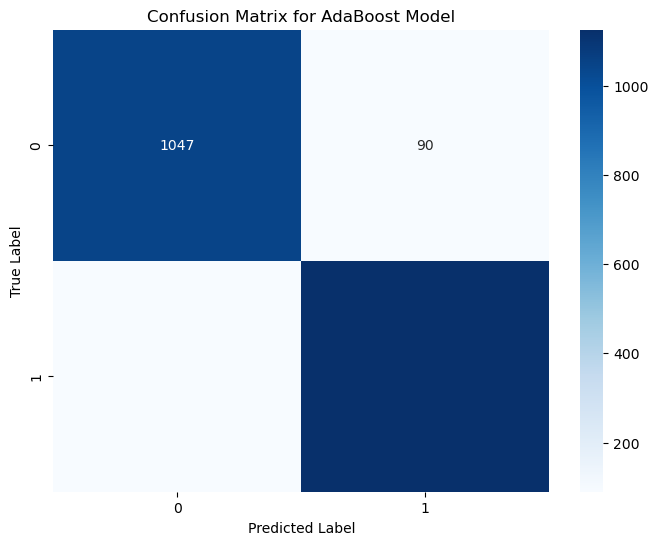

In [9]:
# Create a confusion matrix for the AdaBoost model predictions
conf_matrix = confusion_matrix(y_test, pred_final)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the heat map for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for AdaBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

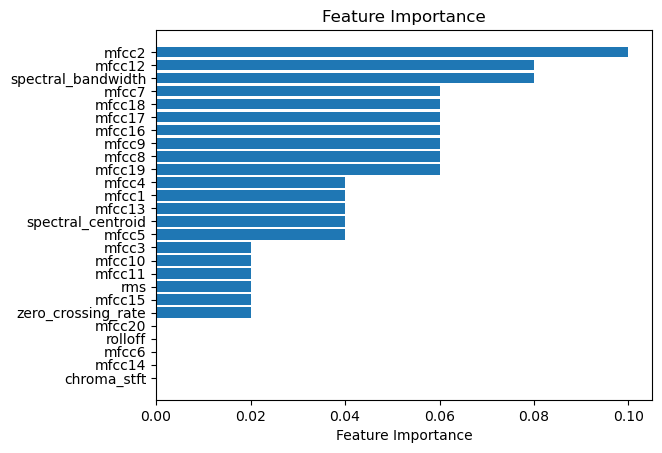

In [7]:
# PLOTTING FEATURE IMPORTANCE
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(feature_names)[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()

plot_feature_importance(model, x_train.columns)